In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import random as r
from math import *
from numpy import linalg as LA
import os
import osmnx as ox


In [17]:
def downloadVille(location,nom_fichier):
    base_filepath = "C:/Users/Dreyer Simon/Documents/Travail/5A/Stage de recherche/code python/data/"
    G = ox.graph_from_place(location, network_type="drive")
    G = rename_nodes(G)

    filepath = base_filepath + nom_fichier + ".graphml"
    ox.save_graphml(G, filepath)


def loadVille(nom_fichier):
    base_filepath = "C:/Users/Dreyer Simon/Documents/Travail/5A/Stage de recherche/code python/data/"
    filepath = base_filepath + nom_fichier + ".graphml"

    return ox.load_graphml(filepath)

# 1. Comparaison complexités algorithmes

In [18]:
%run ../code_python/Complexite_operations.py

## 1.1 Comparaison générateurs simples

In [19]:
Piedmont = loadVille("piedmont")

In [20]:
G = Piedmont
prep_G_v1,c = c_Preprocessing_Graph_naif(G)
prep_G_v2,c = c_Preprocessing_Graph_v2(G)
prep_G_v3,c = c_Preprocessing_Graph_v3(G)

pcc = prep_G_v1[3]

print(f"Nombre de plus courts chemins : {pcc}")

Nombre de plus courts chemins : 620035


In [21]:
donnees_gen_v1 = complexite_generateur_donnees(prep_G_v1, c_Uniforme_PCC_naif, nbRequetes = 1000)
donnees_gen_v2 = complexite_generateur_donnees(prep_G_v2, c_Uniforme_PCC_v2, nbRequetes = 1000)
donnees_gen_v3 = complexite_generateur_donnees(prep_G_v3, c_Uniforme_PCC_v3, nbRequetes = 1000)

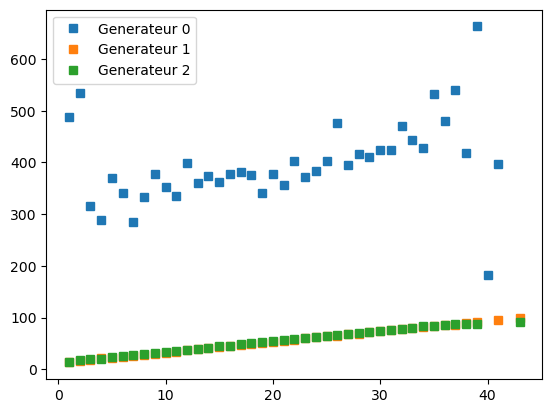

In [22]:
liste_donnees = [donnees_gen_v1,donnees_gen_v2,donnees_gen_v3]
complexite_generateur_comparaison(liste_donnees)

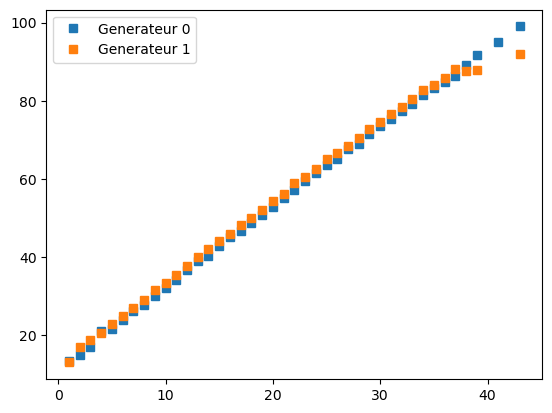

In [23]:
liste_donnees = [donnees_gen_v2,donnees_gen_v3]
complexite_generateur_comparaison(liste_donnees)

## 1.2 Comparaison générateurs longueur

In [24]:
G = Piedmont
prep_long_G_v1,c = c_Preprocessing_Graph_long(G)
prep_long_G_v2,c = c_Preprocessing_Graph_long_v2(G)

pcc = prep_long_G_v1[5]

print(f"Nombre de plus courts chemins : {pcc}")

Nombre de plus courts chemins : 620035


In [25]:
donnees_long_gen_v1 = complexite_generateur_donnees(prep_long_G_v1, c_Uniforme_PCC_long, nbRequetes = 1000)
donnees_long_gen_v2 = complexite_generateur_donnees(prep_long_G_v2, c_Uniforme_PCC_long_v2, nbRequetes = 1000)

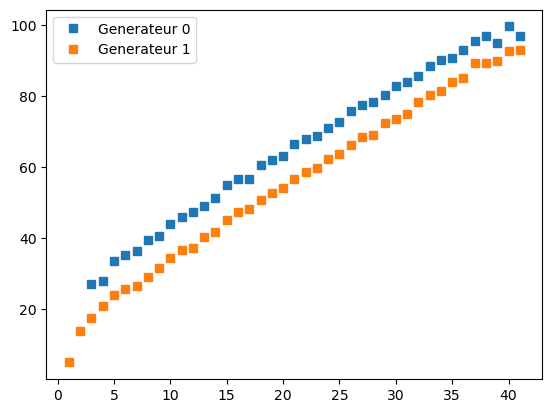

In [26]:
liste_donnees = [donnees_long_gen_v1,donnees_long_gen_v2]
complexite_generateur_comparaison(liste_donnees)

## 1.3 Comparaison classique et long

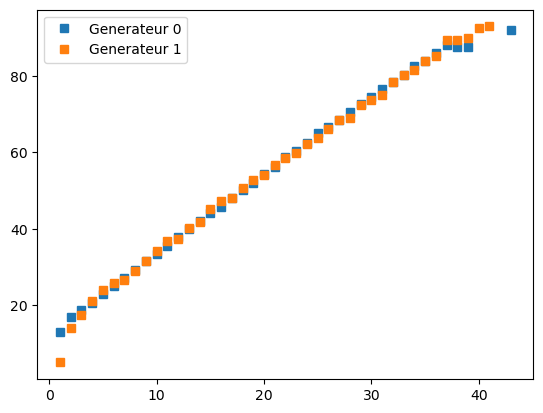

In [27]:
liste_donnees = [donnees_gen_v3,donnees_long_gen_v2]
complexite_generateur_comparaison(liste_donnees)

# 2. Sur un graphe de ville plus grand

In [13]:
Reykjavik = loadVille('reykjavik')
print(Reykjavik)

MultiDiGraph with 5304 nodes and 10909 edges


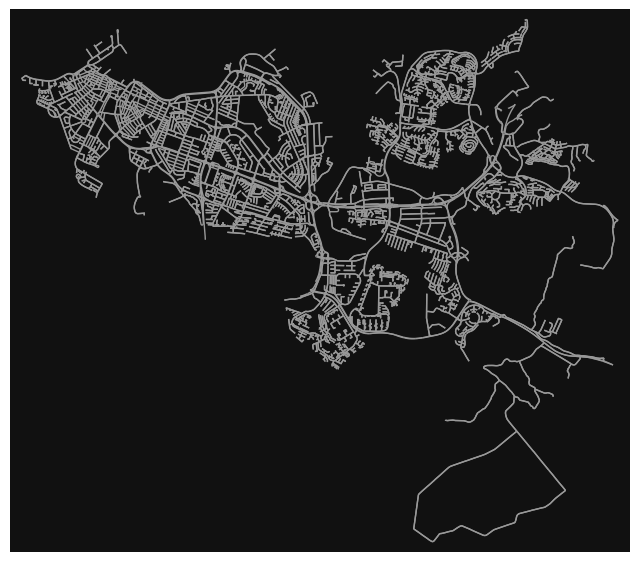

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [14]:
ox.plot_graph(Reykjavik, node_size=0)

In [15]:
%run ../code_python/Algo_long_v2.py

In [41]:
avant = time.time()
reykjavik = Preprocessing_Graph_long_v2(Reykjavik)
apres = time.time()
print(f"Temps de preprocessing : {apres - avant}")

Temps de preprocessing : 196.93702459335327


In [43]:
pcc_le_plus_long = len(reykjavik[3]) - 1
nb_pcc = reykjavik[4]
print(f"{nb_pcc} plus courts chemins de longueur comprise entre 0 et {pcc_le_plus_long}")

64385238 plus courts chemins de longueur comprise entre 0 et 109


In [45]:
Uniforme_PCC_long_v2(reykjavik)

[278,
 669,
 4901,
 3780,
 3784,
 3785,
 1151,
 4911,
 4913,
 806,
 4188,
 4184,
 4182,
 4799,
 4827,
 5273,
 5098,
 4298,
 4378,
 250,
 4588,
 5302,
 1258,
 274,
 252,
 636,
 638,
 4975]

<Figure size 640x480 with 0 Axes>

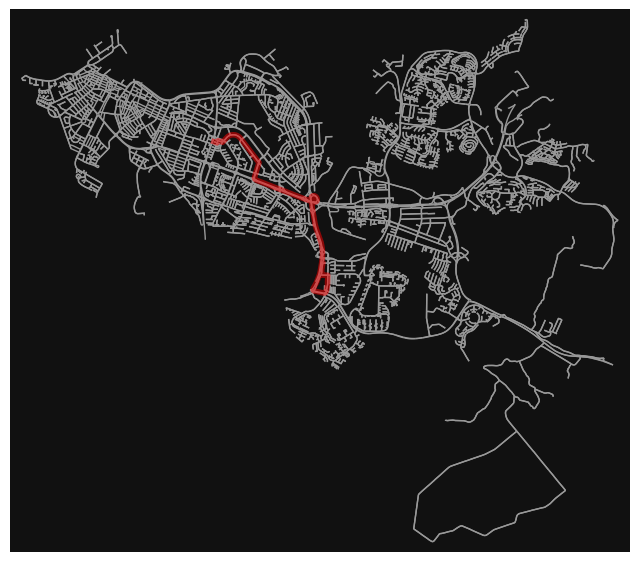

C:\Users\Dreyer Simon\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [51]:
DrawOX_Uniforme_PCC_long_v2(Reykjavik, reykjavik)

In [53]:
l = 50
chemin = Uniforme_PCC_long_v2(reykjavik,l,l)
len(chemin)

51

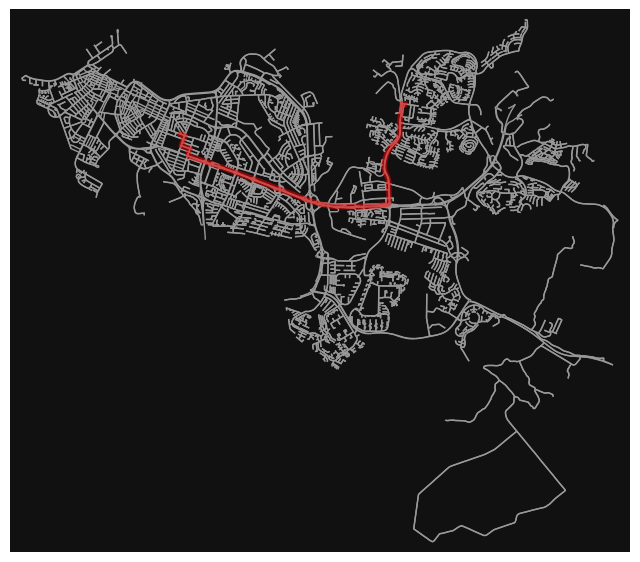

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [56]:
ox.plot_graph_route(Reykjavik, chemin, orig_dest_size=0, node_size=0)

In [62]:
chemin = Uniforme_PCC_long_v2(reykjavik,l_min = 80,l_max = 100)
len(chemin)

90

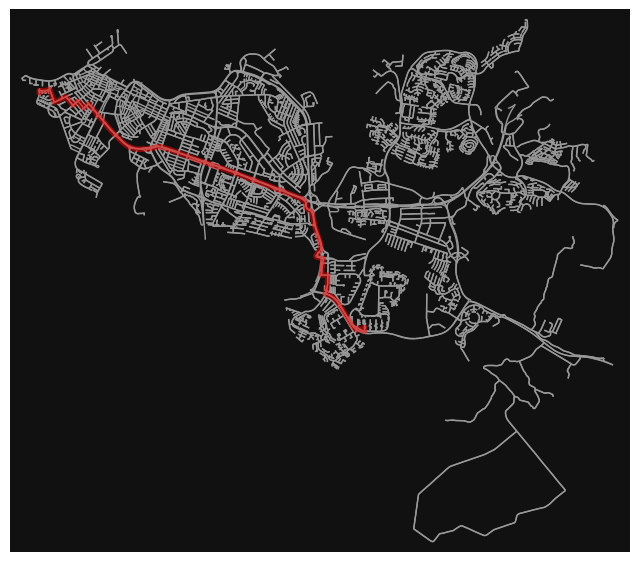

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [63]:
ox.plot_graph_route(Reykjavik, chemin, orig_dest_size=0, node_size=0)

In [64]:
chemin = Unranking_PCC_long_v2(reykjavik,-1)
len(chemin)

110

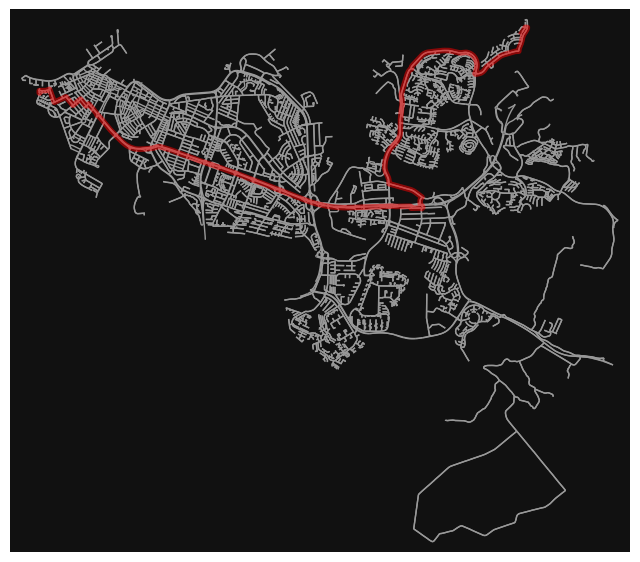

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [65]:
ox.plot_graph_route(Reykjavik, chemin, orig_dest_size=0, node_size=0)

# 3. Génération de tous les DAGs

voir Sage